# Movie Trend Analysis

**Authors:** Julian Wivina
***

## Overview

This project aims to analyse the most successful movie genres according to a number of variables. To generate good insights, I examine movie data for any trends so as to generate recommendations for Microsoft's planned movie studio.

## Business Problem

Microsoft is looking to break into the movie industry and requires business recommendations about what films are doing well in the box office. I explore the average ratings and gross figures for genres of movies and further analyse how important each variable is.

In [495]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Understanding

Domestic and foreign gross figures for movies according from Box Office Mojo.

In [536]:
movie_gross = pd.read_csv('ZippedData/bom.movie_gross.csv.gz')
movie_gross = movie_gross.rename(columns = {'title': 'primary_title'})
movie_gross.set_index('primary_title', inplace=True)
movie_gross.head()

,studio,domestic_gross,foreign_gross,year
primary_title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


Data from IMDB containing average ratings and genres for movies.

In [710]:
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
title_ratings.set_index('tconst', inplace=True)
title_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [498]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_basics.set_index('tconst', inplace=True)
title_basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Information from IMDB containing notable people who worked on each movie.

In [537]:
crew_id = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
crew_id.set_index('nconst', inplace=True)
crew_id.head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [538]:
crew_name = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
crew_name = crew_name.rename(columns ={'directors': 'nconst'})
crew_name.set_index('nconst', inplace=True )
crew_name.head()

,tconst,writers
nconst,,
nm0899854,tt0285252,nm0899854
NaN,tt0438973,"nm0175726,nm1802864"
nm1940585,tt0462036,nm1940585
nm0151540,tt0835418,"nm0310087,nm0841532"
"nm0089502,nm2291498,nm2292011",tt0878654,nm0284943


## Data preparation

In [717]:
#Join two dataframes to show relationships between movie names and their respective ratings
ratings = title_ratings.join(title_basics, how='inner')

#Joining two dataframes to show which people were writers for each movie
crew = crew_id.join(crew_name, how='inner')
crew = crew.drop('birth_year', axis=1)
crew.set_index('tconst', inplace=True)

#Joining the crew and ratings to create one dataframe showing all the information so far
df = ratings.join(crew, how='inner')
df.set_index('primary_title', inplace= True)
df = df.drop(['original_title', 'primary_profession', 'known_for_titles', 'writers', 'death_year'], axis=1)

#Joining the last dataframe to show each movie's domestic and foreign gross
df2 = df.join(movie_gross, how='inner')
df2.head()

,averagerating,numvotes,start_year,runtime_minutes,genres,primary_name,studio,domestic_gross,foreign_gross,year
primary_title,,,,,,,,,,
'71,7.2,46103,2014,99.0,"Action,Drama,Thriller",Yann Demange,RAtt.,1300000.0,355000,2015
"1,000 Times Good Night",7.1,6848,2013,117.0,"Drama,War",Erik Poppe,FM,53900.0,NaN,2014
10 Cloverfield Lane,7.2,260383,2016,103.0,"Drama,Horror,Mystery",Dan Trachtenberg,Par.,72100000.0,38100000,2016
10 Years,6.1,22484,2011,100.0,"Comedy,Drama,Romance",Jamie Linden,Anch.,203000.0,NaN,2012
1001 Grams,6.3,1301,2014,93.0,Drama,Bent Hamer,KL,11000.0,NaN,2015


### Master Dataframes

The last dataframe we have joined shows a summary of all the previous dataframes combined into one using the gross as the final join.

The genre columns contains multiple entries which make it difficult to analyse the data. To remedy this, I have split the genres into their own columns in two different formats.

The first master dataframe has each genre entry separated into three different columns for each movie.

In [726]:
df2[['genre_1', 'genre_2', 'genre_3']] = df2['genres'].str.split(',', expand=True)
master_df = df2.drop(['genres'], axis=1)
master_df = master_df.reset_index()
master_df.head()

,primary_title,averagerating,numvotes,start_year,runtime_minutes,primary_name,studio,domestic_gross,foreign_gross,year,genre_1,genre_2,genre_3
0,'71,7.2,46103,2014,99.0,Yann Demange,RAtt.,1300000.0,355000,2015,Action,Drama,Thriller
1,"1,000 Times Good Night",7.1,6848,2013,117.0,Erik Poppe,FM,53900.0,NaN,2014,Drama,War,None
2,10 Cloverfield Lane,7.2,260383,2016,103.0,Dan Trachtenberg,Par.,72100000.0,38100000,2016,Drama,Horror,Mystery
3,10 Years,6.1,22484,2011,100.0,Jamie Linden,Anch.,203000.0,NaN,2012,Comedy,Drama,Romance
4,1001 Grams,6.3,1301,2014,93.0,Bent Hamer,KL,11000.0,NaN,2015,Drama,None,None


In [654]:
master_df['foreign_gross'] = pd.to_numeric(master_df['foreign_gross'], errors ='coerce').astype('Float64')

The second master dataframe compiled shows a reshaped data set with select columns that duplicates a movie entry based on it's genre. For example, 10 Cloverfield Lane has one entry with 3 different genres displayed over three different columns; this will instead be presented with 3 different entries for the same movie for each genre.

In [722]:
melted_columns = ['primary_title', 'averagerating', 'domestic_gross', 'foreign_gross', 'genre_1', 'genre_2', 'genre_3']
melted_df = master_df[melted_columns]
melted_df.head()

,primary_title,averagerating,domestic_gross,foreign_gross,genre_1,genre_2,genre_3
0,'71,7.2,1300000.0,355000,Action,Drama,Thriller
1,"1,000 Times Good Night",7.1,53900.0,NaN,Drama,War,None
2,10 Cloverfield Lane,7.2,72100000.0,38100000,Drama,Horror,Mystery
3,10 Years,6.1,203000.0,NaN,Comedy,Drama,Romance
4,1001 Grams,6.3,11000.0,NaN,Drama,None,None


In [724]:
master_df2 = pd.melt(melted_df, id_vars=['primary_title', 'averagerating', 'foreign_gross', 'domestic_gross'], 
                    value_vars=['genre_1', 'genre_2', 'genre_3'],
                    value_name='genre')
master_df2.head()

,primary_title,averagerating,foreign_gross,domestic_gross,variable,genre
0,'71,7.2,355000,1300000.0,genre_1,Action
1,"1,000 Times Good Night",7.1,NaN,53900.0,genre_1,Drama
2,10 Cloverfield Lane,7.2,38100000,72100000.0,genre_1,Drama
3,10 Years,6.1,NaN,203000.0,genre_1,Comedy
4,1001 Grams,6.3,NaN,11000.0,genre_1,Drama


## Analysis of ratings and gross by Genres

As some movies have multiple genres, each genre has been separated into 3 new columns called genre_1, genre_2, and genre_3.
The data from each column is then compiled into one to show the average ratings and gross figures per genre. This
data is visualised in a bar graph.

### Ratings analysis by Genre

In [520]:
genre_count = (master_df['genre_1'].value_counts()
               .add(master_df['genre_2'].value_counts(), fill_value=0)
               .add(master_df['genre_3'].value_counts(), fill_value=0)
              )
genre_count

Action          599.0
Adventure       368.0
Animation        92.0
Biography       268.0
Comedy          822.0
Crime           363.0
Documentary     173.0
Drama          1660.0
Family          102.0
Fantasy         161.0
History         129.0
Horror          219.0
Music            87.0
Musical          17.0
Mystery         190.0
News              2.0
Romance         448.0
Sci-Fi          123.0
Sport            46.0
Thriller        430.0
War              49.0
Western          20.0
Name: count, dtype: float64

To avoid data being skewed, we will be excluding genres with less than 50 movie entries.

In [413]:
excluded_genres = 'Musical', 'News', 'Sport', 'War', 'Western'

An average for each genre column is calculated so as to account for movies with multiple genres. All three datasets are compiled into one overall dataset, which we then apply the filter of excluded genres.

In [625]:
avg_genre_rating_1 = master_df.groupby('genre_1')['averagerating']

In [575]:
#Calculate the average rating per genre in each genre column
avg_genre_rating_1 = master_df.groupby('genre_1')['averagerating'].mean().reset_index()
avg_genre_rating_1 = avg_genre_rating_1.rename(columns = {'genre_1' : 'genre'})

avg_genre_rating_2 = master_df.groupby('genre_2')['averagerating'].mean().reset_index()
avg_genre_rating_2 = avg_genre_rating_2.rename(columns = {'genre_2' : 'genre'})

avg_genre_rating_3 = master_df.groupby('genre_3')['averagerating'].mean().reset_index()
avg_genre_rating_3 = avg_genre_rating_3.rename(columns = {'genre_3' : 'genre'})

#Merge the columns to form one genre column that shows the combined average rating across each column
merged_gen_1 = pd.merge(avg_genre_rating_1, avg_genre_rating_2, on= 'genre', how='outer')
gen_rating = pd.merge(merged_gen_1, avg_genre_rating_3, on= 'genre', how='outer')
gen_rating['avg_rating'] = gen_rating[['averagerating_x', 'averagerating_y', 'averagerating']].mean(axis=1)
gen_rating = gen_rating.drop(['averagerating_x', 'averagerating_y', 'averagerating'], axis=1)

#Filter out the excluded genres
filtered_gen_rating = gen_rating[~gen_rating['genre'].isin(excluded_genres)]
filtered_gen_rating

,genre,avg_rating
0,Action,6.260935
1,Adventure,6.410221
2,Animation,6.760812
3,Biography,6.965604
4,Comedy,6.184966
5,Crime,6.387188
6,Documentary,7.407621
7,Drama,6.601468
8,Family,5.955606
9,Fantasy,6.226161


The table above shows us an average rating for each genre type that contains more than 50 movies.

To help visualise the data, a box and whisker plot was made to show spread and outliers for each genre as well. This will help analyse risk involved with a genre depending on how big the spread is.

<Figure size 1000x1000 with 0 Axes>

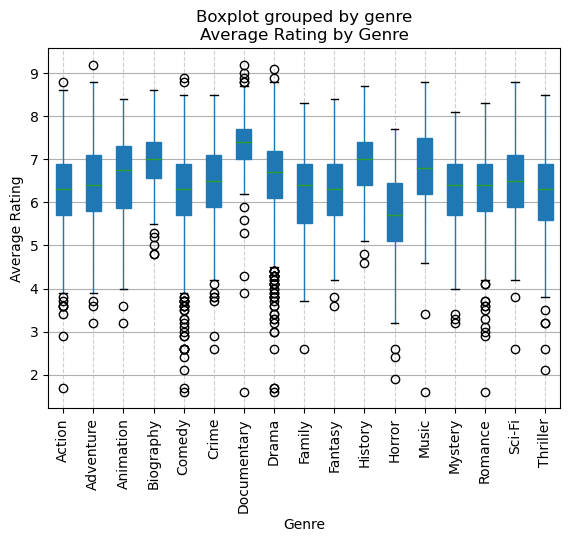

In [681]:
#Filter out excluded genres from the second master dataframe
filtered_master_df2 = master_df2[~master_df2['genre'].isin(excluded_genres)]

#Create a box and whisker plot average rating per genre
plt.figure(figsize=(10, 10)) 
filtered_master_df2.boxplot(column='averagerating',
                  by='genre',
                  patch_artist=True)

plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation='vertical')

plt.show()

As shown by the table and box and whisker plots, the highest rated genres with the least amount of spread appear to be biography, documentary, and history. Interestingly, non-fiction genres appear to be highly rated.

### Domestic Gross analysis by Genre
The same process is done for domestic gross as well.

In [576]:
#Calculate the average domestic gross per genre in each genre column
avg_dom_gross_1 = master_df.groupby('genre_1')['domestic_gross'].mean().reset_index()
avg_dom_gross_1 = avg_dom_gross_1.rename(columns = {'genre_1' : 'genre'})

avg_dom_gross_2 = master_df.groupby('genre_2')['domestic_gross'].mean().reset_index()
avg_dom_gross_2 = avg_dom_gross_2.rename(columns = {'genre_2' : 'genre'})

avg_dom_gross_3 = master_df.groupby('genre_3')['domestic_gross'].mean().reset_index()
avg_dom_gross_3 = avg_dom_gross_3.rename(columns = {'genre_3' : 'genre'})

#Merge the columns to form one genre column that shows the combined domestic gross across each column
merged_gross_1 = pd.merge(avg_dom_gross_1, avg_dom_gross_2, on= 'genre', how='outer')
dom_gross = pd.merge(merged_gross_1, avg_dom_gross_3, on= 'genre', how='outer')
dom_gross['avg_dom_gross'] = dom_gross[['domestic_gross_x', 'domestic_gross_y', 'domestic_gross']].mean(axis=1).astype(int)
dom_gross = dom_gross.drop(['domestic_gross_x', 'domestic_gross_y', 'domestic_gross'], axis=1)

#Filter out the excluded genres
filtered_dom_gross = dom_gross[~gen_rating['genre'].isin(excluded_genres)]
filtered_dom_gross

,genre,avg_dom_gross
0,Action,58309319
1,Adventure,86179323
2,Animation,63579388
3,Biography,34972932
4,Comedy,49417251
5,Crime,25823297
6,Documentary,7652402
7,Drama,17864764
8,Family,30666654
9,Fantasy,49762076


<Figure size 1000x1000 with 0 Axes>

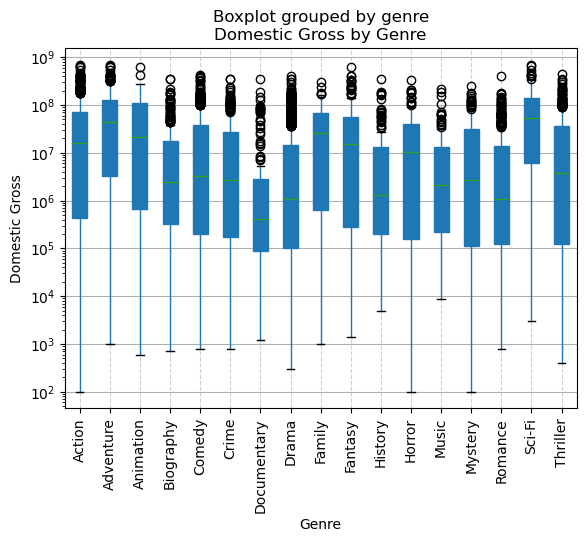

In [684]:
#Create a box and whisker plot of domestic gross per genre
plt.figure(figsize=(10, 10)) 
filtered_master_df2.boxplot(column='domestic_gross',
                  by='genre',
                  patch_artist=True)

#Use a log transformation on the y axis due to the highly skewed data for a better representation
plt.yscale('log')

plt.xlabel('Genre')
plt.ylabel('Domestic Gross')
plt.title('Domestic Gross by Genre')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(rotation='vertical')

plt.show()

As shown by the table and box and whisker plots, the highest grossing genres with the least amount of spread appear to adventure, animation and sci-fi.

### Factoring in Foreign Gross

A large portion of the movies in the dataset do not have a foreign gross recorded.

Number of listed movies

In [686]:
master_df.shape[0]

2749

Number of listed movies without a foreign gross entry

In [685]:
master_df['foreign_gross'].isna().sum()

1103

To account for the missing data, a linear regression will be used to see if domestic gross is a good predictor of foreign gross. We will first create a table containing only the domestic and foreign gross values.

In [620]:
gross_columns = ['domestic_gross', 'foreign_gross']
master_gross = master_df[gross_columns]
master_gross = master_gross.dropna()
master_gross['domestic_gross'] = master_gross['domestic_gross'].astype(int)
master_gross['foreign_gross'] = master_gross['foreign_gross'].astype(int)
master_gross

,domestic_gross,foreign_gross
0,1300000,355000
2,72100000,38100000
5,1300000,10900000
6,32800,5700000
7,45800000,21600000
...,...,...
2734,5000000,353000000
2741,724000,20300000
2743,95700000,37100000
2747,80400000,89500000


These values are then visualised in a scatterplot. Due to a heavy skew towards lower values, a log transformation was done on the data for a better visualisation.

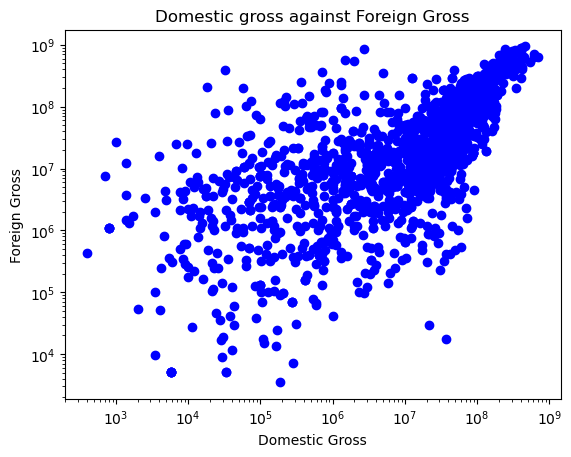

In [677]:
plt.scatter(master_gross['domestic_gross'], master_gross['foreign_gross'], color = 'blue')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Domestic gross against Foreign Gross')

plt.show()

Finally, a linear regression model is used to analyse the data points above to see how strong an indicator domestic gross is for foreign gross.

In [611]:
import statsmodels.api as sm

In [618]:
X= sm.add_constant(master_gross['domestic_gross'])
y = master_gross['foreign_gross']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          foreign_gross   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     3230.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:58:38   Log-Likelihood:                -31858.
No. Observations:                1628   AIC:                         6.372e+04
Df Residuals:                    1626   BIC:                         6.373e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.956e+06   2.24e+06      3.

With an R-squared value of 0.665, we can conclude that there is a relatively high level of correlation. This is further validated with a p-value of less than 0.05 for domestic gross. Thus, we can conclude that domestic gross can be used as a strong predictor of foreign gross.

### Do ratings predict gross? 

It is apparent that the recommendations based on ratings and gross are conflicting. To get a more concrete recommendation for genres that perform well, a linear regression model will also be used to analyse if ratings are a good predictor of domestic gross. 

In [703]:
gross_rating_columns = ['averagerating', 'domestic_gross']
gross_rating = filtered_master_df2[gross_rating_columns]
gross_rating = gross_rating.dropna()
gross_rating['domestic_gross'] = gross_rating['domestic_gross'].astype(int)

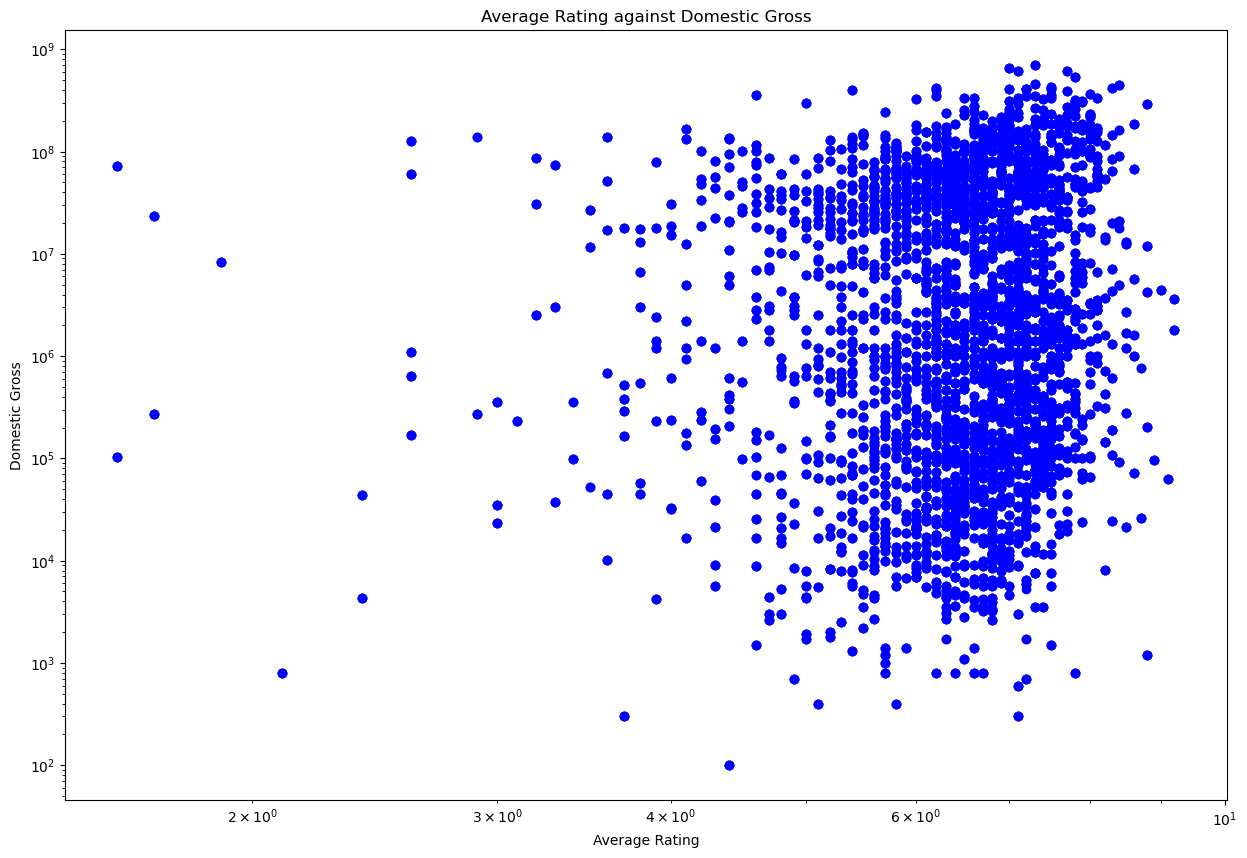

In [709]:
plt.figure(figsize=(15, 10))

plt.scatter(gross_rating['averagerating'], gross_rating['domestic_gross'], color = 'blue')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Average Rating')
plt.ylabel('Domestic Gross')
plt.title('Average Rating against Domestic Gross')

plt.show()

In [705]:
X= sm.add_constant(gross_rating['averagerating'])
y = gross_rating['domestic_gross']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         domestic_gross   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     111.5
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           6.66e-26
Time:                        19:28:17   Log-Likelihood:            -1.5604e+05
No. Observations:                8059   AIC:                         3.121e+05
Df Residuals:                    8057   BIC:                         3.121e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.84e+07   4.52e+06     -4.072

Given the regression results, it can be said that ratings have a statistically significant impact on domestic gross with a p-value<0.05. However, the calcualted R-squared value of 0.014 suggests that it only accounts for 1.4% of the variability displayed by domestic gross. Due to this, it cannot be concluded that ratings are a strong predictor of domestic gross.

## Conclusions

### Main takeaways
To determine which genres are highly successful, an analysis of movies with a rating and domestic gross entry was done. This leads to the following recommendations:
* **Non-fiction genres perform well in the ratings category.** The best performing genres according to ratings are documentary, biography, and history.
* **Mainstream genres generate higher domestic gross.** The highest grossing movie genres domestically are adventure, animation and sci-fi
* **Domestic gross predicts foreign gross.** Domestic gross is a good predictor of how a movie will perform internationally.
* **High ratings indicate a high gross, but does not predict it.** Ratings only account for 1.4% of the variability in gross.

### Next steps
* **Depending on what Microsoft values, the model could be used to determine the best variables for making a movie.** For example, giving weighted values for genre and rating will generate a metric that can be used to then determine best director, runtime, etc.